In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Parameters
dim = len(X[0])
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 0

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

In [3]:
FastICA = make_pipeline(StandardScaler(),
                        FastICA(n_components=2,
                                algorithm = 'parallel',
                                whiten = True,
                                max_iter = 100,
                                random_state=random_state))

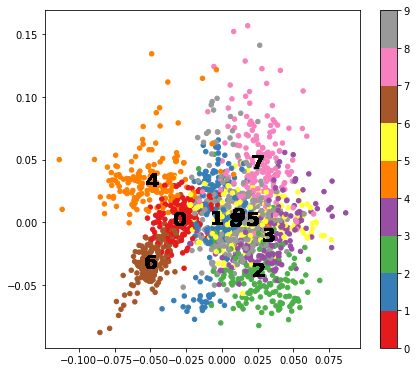

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Make a list of the methods to be compared
dim_reduction_methods = {'ICA': FastICA }
                         
plt.figure(figsize=(24, 36))

for j,(name, model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(5, 3, j + 1, aspect='auto')

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit the methons using the fitted model
    X_embedded = model.transform(X)
    
    # Creating a dataframe to easily plot the sample label
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis=1))

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
    plt.colorbar()
    
    # Label the data distributions
    for i, number in enumerate(y_test):
        plt.annotate(number,
                     df.loc[df[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20')
    
plt.show()